In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

sns.set()

In [2]:
seed=random.randint(1, 10000000)

In [4]:
df_segmentation=pd.read_csv('C:/Users/armaod/Documents/Customer-Analysis/data/segmentation data.csv', index_col=0)

# Data visualization

In [4]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [11]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [12]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

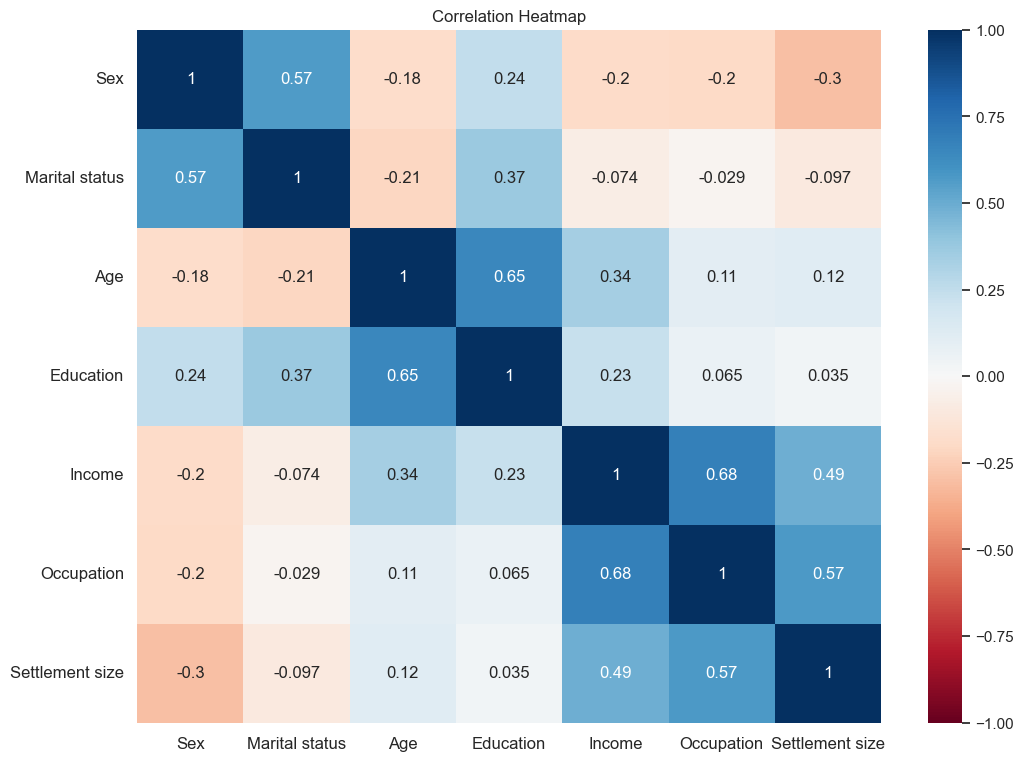

In [22]:
plt.figure(figsize =(12,9))
s = sns.heatmap(df_segmentation.corr(), annot = True, cmap='RdBu',vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=0, fontsize=12)
plt.title('Correlation Heatmap')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

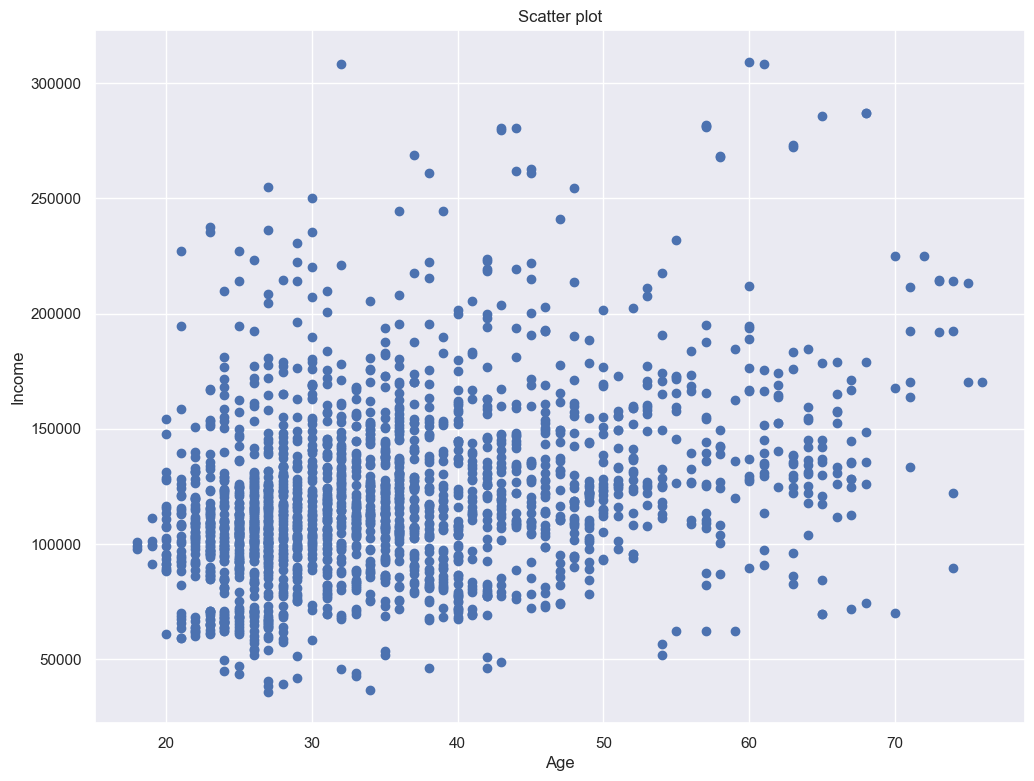

In [24]:
plt.figure(figsize =(12,9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot')
plt.show

# Standardization

In [13]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_segmentation)

# Hierarchical Clustering

In [31]:
hier_clust= linkage(df_std, method ='ward')

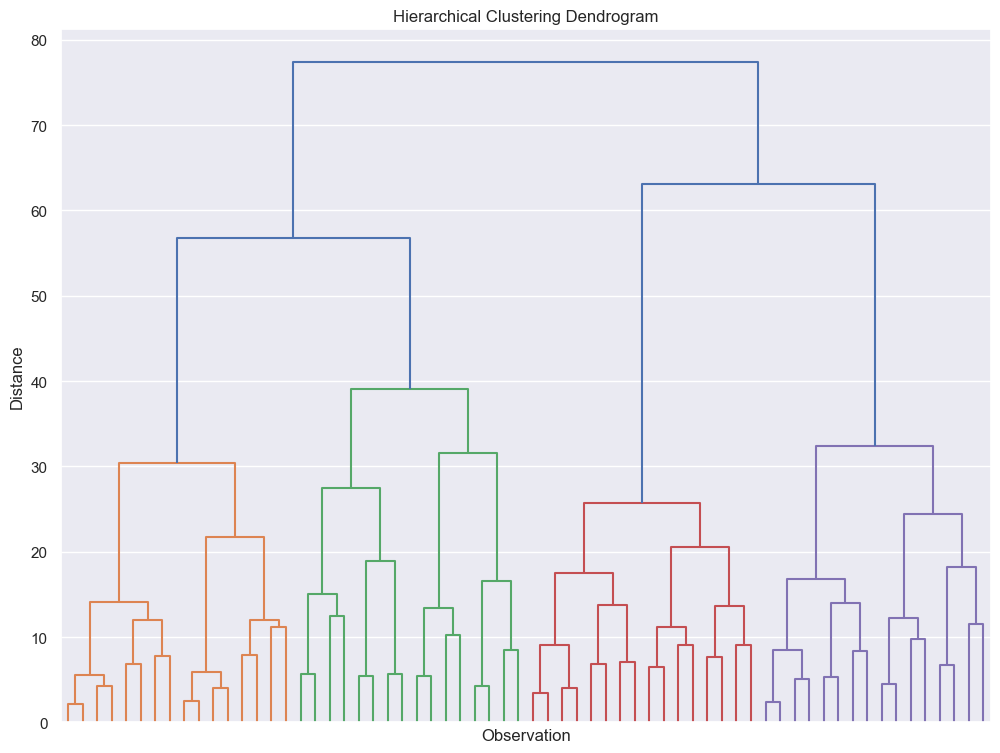

In [36]:
plt.figure(figsize =(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode='level',
           p =5,
           show_leaf_counts=False,
           no_labels=True)
plt.show()

Una soluzione per scegliere dove tagliare è determinare il numero di cluster e scegliere un livello dove la linea verticale del dedogramma non è tagliata da altre linee orizzontalitaggliata

# K-means Clustering

In [6]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=seed, n_init="auto")
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

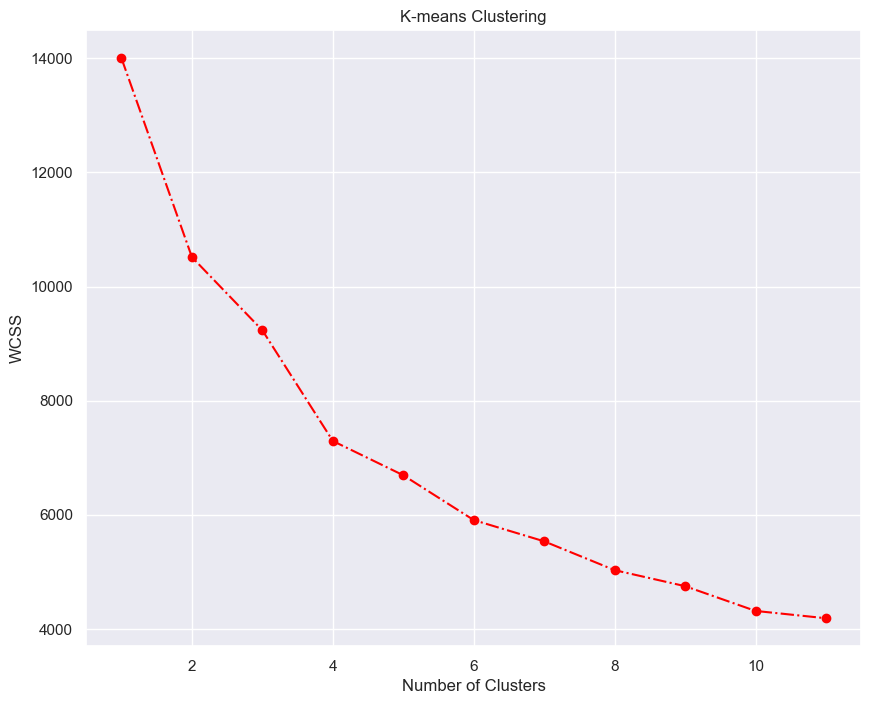

In [7]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 12), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

Il "gomito" del grafico è con 4 clusters

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=seed, n_init="auto")
kmeans.fit(df_std)

KMeans(n_clusters=4, n_init='auto', random_state=4320037)

In [34]:
df_std_kmeans = df_segmentation.copy()
df_std_kmeans['cluster_lables'] = kmeans.labels_
df_cluster_analysis=df_std_kmeans.groupby(['cluster_lables']).mean()
df_cluster_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_lables,,,,,,,
0,0.494297,0.684411,55.855513,2.129278,158249.581749,1.125475,1.102662
1,0.630719,0.449346,33.424837,0.944444,88944.522876,0.081699,0.009804
2,0.730483,0.986989,28.018587,1.005576,120494.472119,1.070632,0.838290
3,0.008518,0.011925,36.793867,0.676320,138039.393526,1.190801,1.245315


In [35]:
df_cluster_analysis['cluster_counts']=df_std_kmeans[['cluster_lables', 'Sex']].groupby(['cluster_lables']).count()

In [37]:
df_cluster_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_counts
cluster_lables,,,,,,,,
0,0.494297,0.684411,55.855513,2.129278,158249.581749,1.125475,1.102662,263
1,0.630719,0.449346,33.424837,0.944444,88944.522876,0.081699,0.009804,612
2,0.730483,0.986989,28.018587,1.005576,120494.472119,1.070632,0.838290,538
3,0.008518,0.011925,36.793867,0.676320,138039.393526,1.190801,1.245315,587


In [ ]:
# rinomianre le lables

<function matplotlib.pyplot.show(close=None, block=None)>

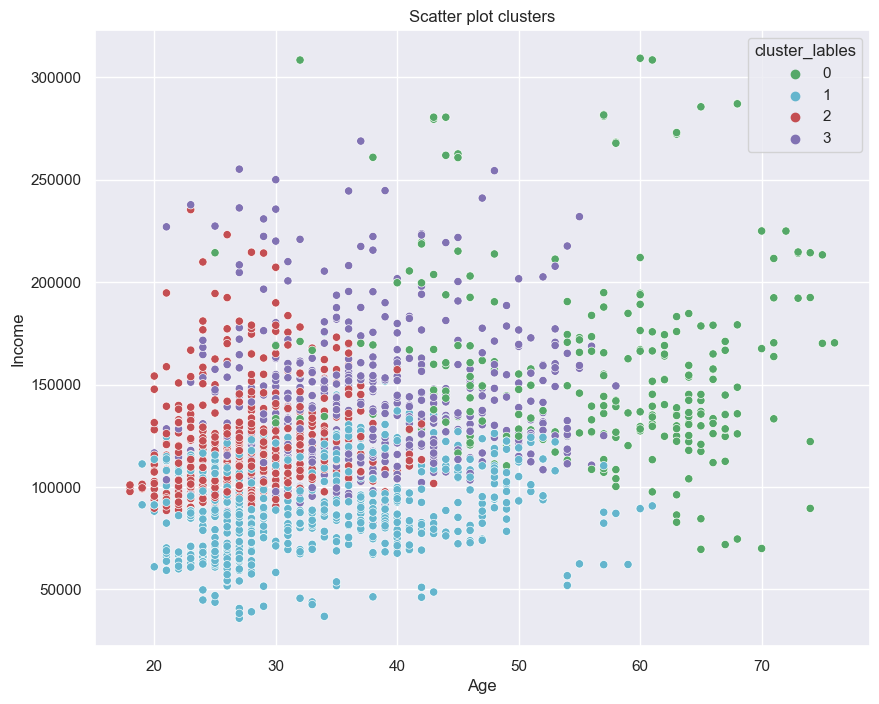

In [44]:
x_axis=df_std_kmeans['Age']
y_axis=df_std_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_std_kmeans['cluster_lables'], palette=['g', 'c', 'r', 'm'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot clusters')
plt.show

# PCA + K-means

In [17]:
pca = PCA()

In [18]:
pca.fit(df_std)

PCA()

In [19]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Ogni variabile spiega una proporzione delle varianza totale. Sono ordinate per importanza, informazione spiegata.

Text(0, 0.5, 'Cumulateted explained variance')

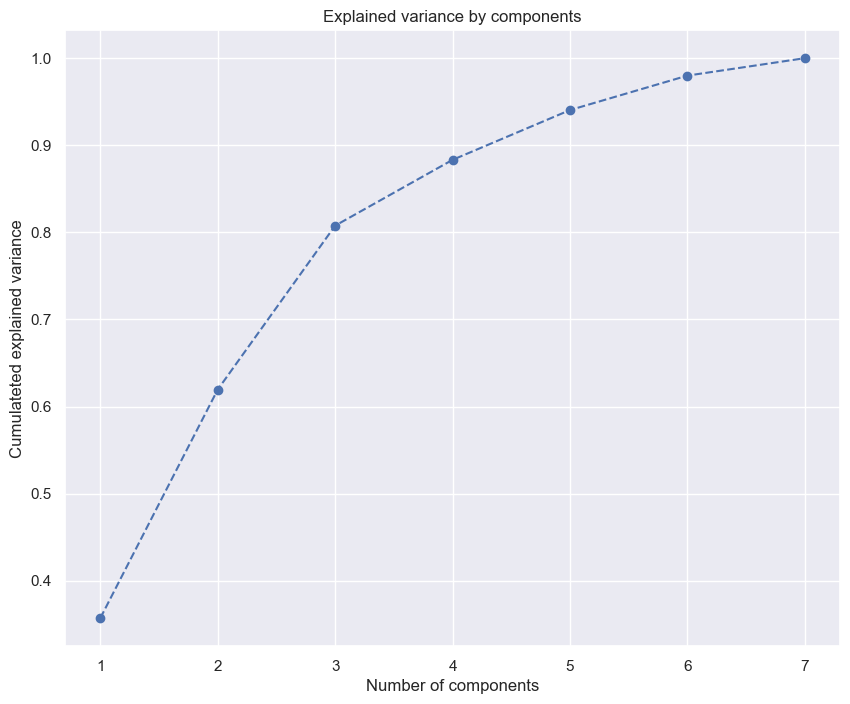

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulateted explained variance')

In [22]:
pca = PCA(n_components=3)
pca.fit(df_std)

PCA(n_components=3)

# PCA Results

In [25]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [26]:
df_decomposed = pd.DataFrame(data = pca.components_,
                             columns = df_segmentation.columns.values,
                             index = ['component1', 'components2', 'component3'])
df_decomposed #essendo valori di correlazione i valori sono compresi tra -1 e 1

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
components2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x13108be4d00>,
 [Text(0, 0, 'component1'),
  Text(0, 1, 'components2'),
  Text(0, 2, 'component3')])

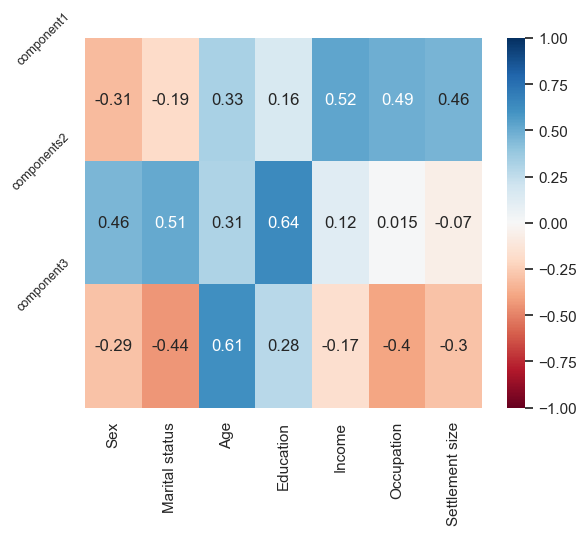

In [31]:
sns.heatmap(df_decomposed, annot = True, cmap='RdBu',vmin=-1, vmax=1)
plt.yticks([0,1,2], ['component1', 'components2', 'component3'], rotation=45, fontsize=9)

La prima componente evidenzia l'importanza delle variabili relative alla carriera:income, occupation, settlement size.
La seconda è relativa al marital status e education.
La terza mostra la relazione negativa tra marital status, income rispetto age.

In [33]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [34]:
scores_pca=pca.transform(df_std)

In [36]:
wcss = []
for i in range(1,12):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=seed, n_init="auto")
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

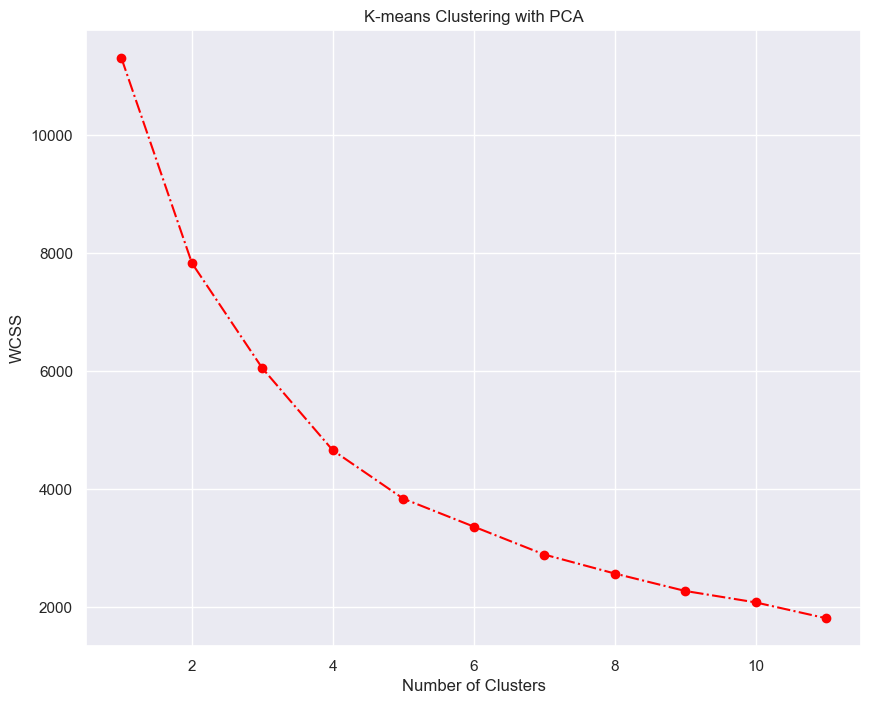

In [37]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 12), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with PCA')
plt.show()

Di nuovo 4 cluster è la decisione migliore

In [66]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=seed, n_init="auto")
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, n_init='auto', random_state=4299935)

In [67]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['component1', 'components2', 'component3']
df_segm_pca_kmeans['segmented_kmenas_pca'] = kmeans_pca.labels_

In [50]:
df_segm_pca_kmeans[['segmented_kmenas_pca', 'Sex']].groupby(['segmented_kmenas_pca']).count()

,Sex
segmented_kmenas_pca,
0,526
1,602
2,262
3,610


In [45]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['segmented_kmenas_pca']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,components2,component3
segmented_kmenas_pca,,,,,,,,,,
0,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
1,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
2,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641
3,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678


E' utile analizzare i valori delle componenti ricordando la matrice di correlazione. Ciò aiuta a definire meglio l'etichetta che definisce il cluster

In [54]:
df_segm_pca_kmeans_freq['N_obs']= df_segm_pca_kmeans[['segmented_kmenas_pca', 'Sex']].groupby(['segmented_kmenas_pca']).count()
df_segm_pca_kmeans_freq['Props Obs'] = df_segm_pca_kmeans_freq['N_obs'] / df_segm_pca_kmeans_freq['N_obs'].sum()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,components2,component3,N_obs,Props Obs
segmented_kmenas_pca,,,,,,,,,,,,
0,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763,526,0.263
1,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063,602,0.301
2,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641,262,0.131
3,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678,610,0.305


In [55]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['segmented_kmenas_pca'].map({
    0 : 'Standard',
    1 : 'career focused',
    2 : 'fewer opportunities',
    3 : 'well-off'
})

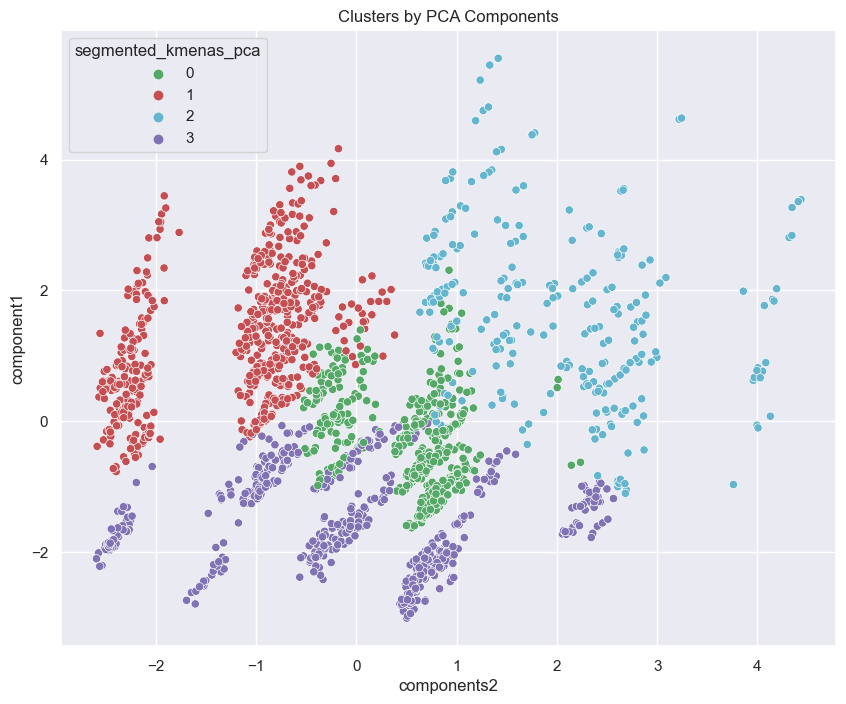

In [62]:
x_axis = df_segm_pca_kmeans['components2']
y_axis = df_segm_pca_kmeans['component1']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_pca_kmeans['segmented_kmenas_pca'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

La divisione dei cluster dopo la pca rende più chiara la visualizzazione della separazione dei clusters

# Data Export

In [71]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))